In [78]:


# !pip install roboflow
# from roboflow import Roboflow
# rf = Roboflow(api_key="QnnzsdXPEsvcmyZQsec6")
# project = rf.workspace("ws-qwbuh").project("constellation-dsphi")
# version = project.version(1)
# dataset = version.download("yolov11")


In [79]:


# !pip install ultralytics
# !pip install seaborn
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random



In [80]:


dataset_path = "Constellation-1"

train_path = dataset_path + "/train"
valid_path = dataset_path + "/valid"
test_path = dataset_path + "/test"

train_imgs = train_path + "/images"
valid_imgs = valid_path + "/images"
test_imgs = test_path + "/images"

train_labels = train_path + "/labels"
valid_labels = valid_path + "/labels"
test_labels = test_path + "/labels"



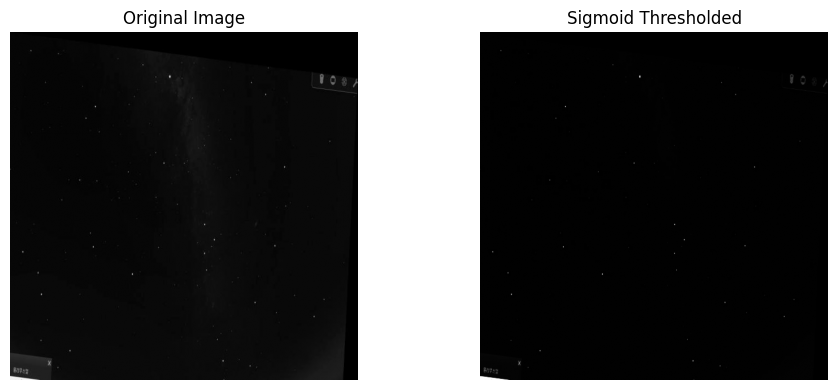

Constellation-1/train/images/2022-07-31-00-00-00-n_png_jpg.rf.03374798505f539f8f9ce89306997d2a.jpg


In [140]:
# Get a random image from the train folder
image_files = [f for f in os.listdir(train_imgs) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    raise ValueError("No image files found in the training directory.")
random_image_file = random.choice(image_files)
image_path = os.path.join(train_imgs, random_image_file)

# Load image in grayscale
original = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply sigmoid contrast enhancement
# You can tweak gain and cutoff to control the steepness and center of the curve
def sigmoid_contrast(img, gain=10, cutoff=128):
    '''
    El parámetro gain controla la pendiente de la curva sigmoide: un valor más alto hace que la transición sea más abrupta.
    El parámetro cutoff determina el punto central de la curva: valores más altos desplazan la curva hacia la derecha, 
    haciendo que sea más difícil que los píxeles más oscuros se vuelvan claros.
    '''
    img = img.astype(np.float32)
    sigmoid = 255 / (1 + np.exp(-gain * (img - cutoff) / 255.0))
    return np.uint8(sigmoid)

transformed = sigmoid_contrast(original, gain=10, cutoff=128)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Sigmoid Thresholded")
plt.imshow(transformed, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

print(image_path)



In [142]:
model = YOLO("yolo11n.pt") # YOLO 11 nano (más chico = más rápido, menos preciso)

results = model.train(
                    data="Constellation-1/data.yaml",
                    epochs=10,
                    imgsz=640,
                    batch=16,
                    name='constellation-detector'
                )

New https://pypi.org/project/ultralytics/8.3.149 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.148 🚀 Python-3.13.2 torch-2.7.0 CPU (Apple M2 Pro)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Constellation-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=constellation-detector2, nbs=64, nms=False, opset=None, optimize=False,

train: Scanning /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/Constellation-1/train/labels.cache... 1641 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1641/1641 [00:00<?, ?it/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 66.2±14.0 MB/s, size: 16.6 KB)



val: Scanning /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/Constellation-1/valid/labels.cache... 469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 469/469 [00:00<?, ?it/s]

Plotting labels to /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/runs/detect/constellation-detector2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0005, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/runs/detect/constellation-detector2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.588      5.119      2.259         43        640: 100%|██████████| 103/103 [26:16<00:00, 15.30s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:22<00:00,  5.52s/it]

                   all        469       1480      0.904     0.0196     0.0713     0.0272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      2.022      3.596      1.684         25        640: 100%|██████████| 103/103 [11:36<00:00,  6.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:19<00:00,  5.28s/it]

                   all        469       1480      0.499      0.401      0.444      0.194

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       3/10         0G      1.953      2.551      1.625         12        640: 100%|██████████| 103/103 [11:42<00:00,  6.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:19<00:00,  5.29s/it]

                   all        469       1480      0.706      0.675      0.723      0.329

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       4/10         0G      1.846      2.068      1.551         26        640: 100%|██████████| 103/103 [11:48<00:00,  6.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:19<00:00,  5.30s/it]

                   all        469       1480      0.773      0.678      0.759      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/10         0G      1.736      1.775      1.474         29        640: 100%|██████████| 103/103 [11:53<00:00,  6.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:20<00:00,  5.35s/it]

                   all        469       1480      0.797       0.81      0.828      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       6/10         0G      1.697       1.62      1.457         20        640: 100%|██████████| 103/103 [11:48<00:00,  6.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:20<00:00,  5.37s/it]

                   all        469       1480      0.834      0.849      0.869      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       7/10         0G       1.64      1.467      1.401         17        640: 100%|██████████| 103/103 [11:53<00:00,  6.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:20<00:00,  5.37s/it]

                   all        469       1480      0.834      0.836       0.87      0.442

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       8/10         0G      1.577      1.399      1.367         33        640: 100%|██████████| 103/103 [11:56<00:00,  6.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:20<00:00,  5.38s/it]

                   all        469       1480      0.869      0.867      0.904      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       9/10         0G      1.534      1.291      1.338         25        640: 100%|██████████| 103/103 [11:54<00:00,  6.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:19<00:00,  5.31s/it]

                   all        469       1480      0.885      0.864      0.902      0.498

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



      10/10         0G      1.492      1.254      1.308         19        640: 100%|██████████| 103/103 [11:51<00:00,  6.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:20<00:00,  5.35s/it]

                   all        469       1480       0.89      0.889      0.913      0.511

10 epochs completed in 2.435 hours.
Optimizer stripped from /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/runs/detect/constellation-detector2/weights/last.pt, 5.5MB


Optimizer stripped from /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/runs/detect/constellation-detector2/weights/best.pt, 5.5MB

Validating /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/runs/detect/constellation-detector2/weights/best.pt...
Ultralytics 8.3.148 🚀 Python-3.13.2 torch-2.7.0 CPU (Apple M2 Pro)
YOLO11n summary (fused): 100 layers, 2,585,272 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [01:15<00:00,  5.07s/it]


                   all        469       1480      0.891      0.889      0.913      0.511
                aquila         68         68      0.979      0.956      0.978       0.61
                bootes         76         76      0.982          1      0.995      0.634
           canis_major         69         69      0.972      0.971      0.983      0.571
           canis_minor         85         85       0.89      0.906      0.934      0.328
            cassiopeia        152        152      0.848      0.974      0.964      0.508
                cygnus         99         99      0.886      0.943      0.942      0.632
                gemini         92         92      0.978      0.967      0.981       0.59
                   leo         70         70      0.981      0.943      0.988      0.664
                  lyra        113        113      0.921       0.85      0.928      0.407
                  moon        111        111      0.684      0.664       0.69      0.286
                 orio


image 1/1 /Users/mateolopezv/Documents/UdeSA/Visión artificial/TPs/TP Final/Constellation-1/test/images/messier_m45_041_png_jpg.rf.6038cd54b7d602d4a89217020c910506.jpg: 640x640 1 pleiades, 54.8ms
Speed: 2.3ms preprocess, 54.8ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


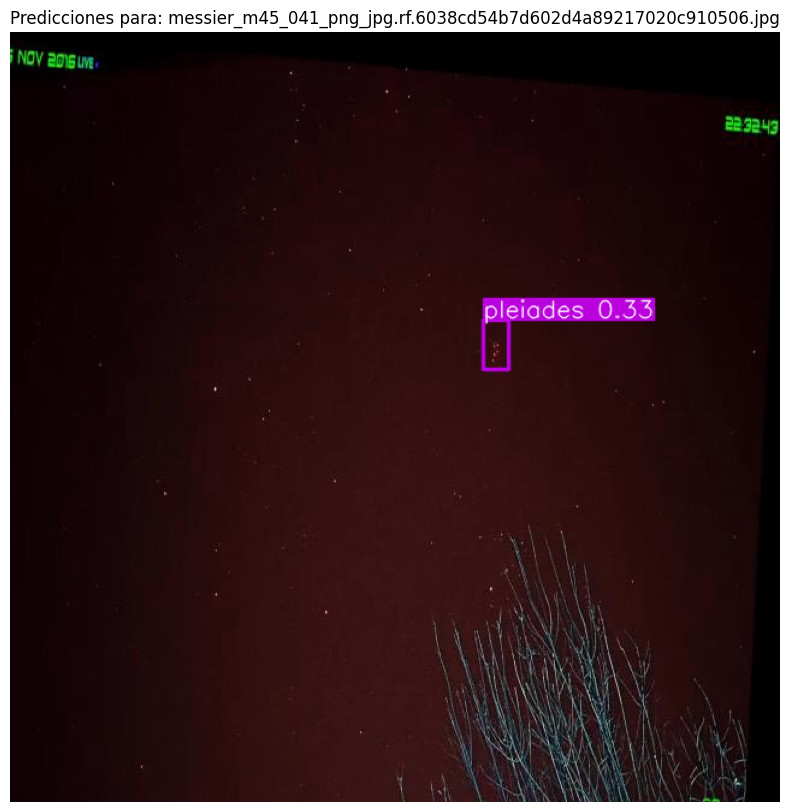

In [149]:
# Get a random image from the test folder
image_files = [f for f in os.listdir(test_imgs) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
if not image_files:
    raise ValueError("No image files found in the training directory.")
random_image_file = random.choice(image_files)
image_path = os.path.join(test_imgs, random_image_file)

result0 = model(image_path)

# Visualizar con matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(result0[0].plot())  # Devuelve un array con la imagen ploteada
plt.axis('off')
plt.title(f"Predicciones para: {random_image_file}")
plt.show()